In [3]:
# Funciones para TDA

#Lectura de datos ejemplo, reducción de dimensionalidad (PCA)y clustering.
#vamos a utilizar un conjunto de datos relacionados con la prevalencia de la tuberculosis infecciosa: 
#https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0

In [1]:
import pandas as pd

In [2]:
existing_df = pd.read_csv(
 filepath_or_buffer='https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv',
 index_col = 0, 
 thousands  = ',')
existing_df.index.names = ['country']
existing_df.columns.names = ['year']

In [ ]:
# Leemos el Archivo CSV de ejemplo

In [3]:
existing_df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [ ]:
# Reducción de dimensionalidad PCA

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(existing_df)

PCA(copy=True, n_components=2, whiten=False)

In [5]:
existing_2d = pca.transform(existing_df)

In [ ]:
#ponemos los datos en una representación dimensional 

In [6]:
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = existing_df.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
country,,
Afghanistan,-732.215864,203.381494
Albania,613.296510,4.715978
Algeria,569.303713,-36.837051
American Samoa,717.082766,5.464696
Andorra,661.802241,11.037736


In [7]:
#Vemos la variación entre ambas componentes casi de un 98%
print(pca.explained_variance_ratio_) 

[ 0.91808789  0.060556  ]


In [ ]:
#veamos los datos con una reducción menor de dimensionalidad entre componentes

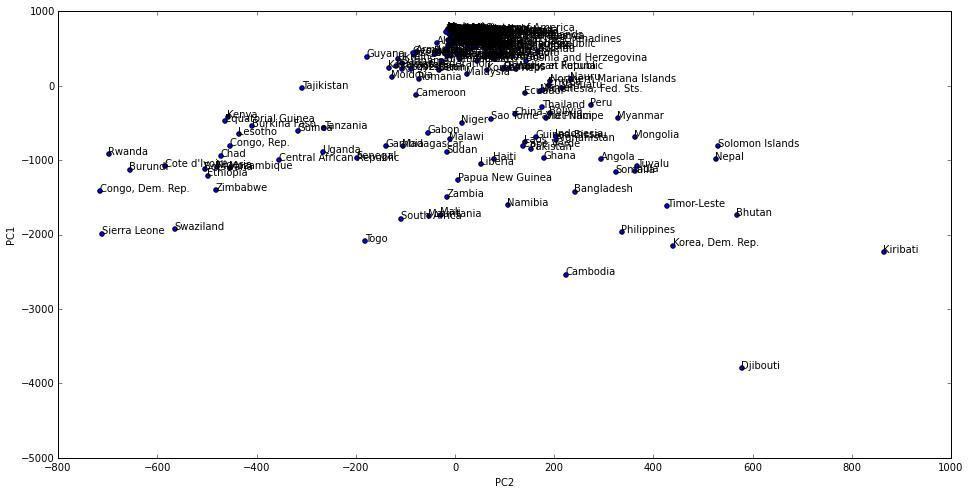

In [8]:
%matplotlib inline

ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, country in enumerate(existing_df.index):
    ax.annotate(
        country, 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)
    )

In [9]:
#haciendo un ajuste para mejor visualización, se agrega un campo re-calculando la media entre años

In [10]:
from sklearn.preprocessing import normalize

existing_df_2d['country_mean'] = pd.Series(existing_df.mean(axis=1), index=existing_df_2d.index)
country_mean_max = existing_df_2d['country_mean'].max()
country_mean_min = existing_df_2d['country_mean'].min()
country_mean_scaled = (existing_df_2d.country_mean-country_mean_min) / country_mean_max
existing_df_2d['country_mean_scaled'] = pd.Series(
        country_mean_scaled, 
        index=existing_df_2d.index) 
existing_df_2d.head()

,PC1,PC2,country_mean,country_mean_scaled
country,,,,
Afghanistan,-732.215864,203.381494,353.333333,0.329731
Albania,613.296510,4.715978,36.944444,0.032420
Algeria,569.303713,-36.837051,47.388889,0.042234
American Samoa,717.082766,5.464696,12.277778,0.009240
Andorra,661.802241,11.037736,25.277778,0.021457


In [ ]:
#veamos el resultado 

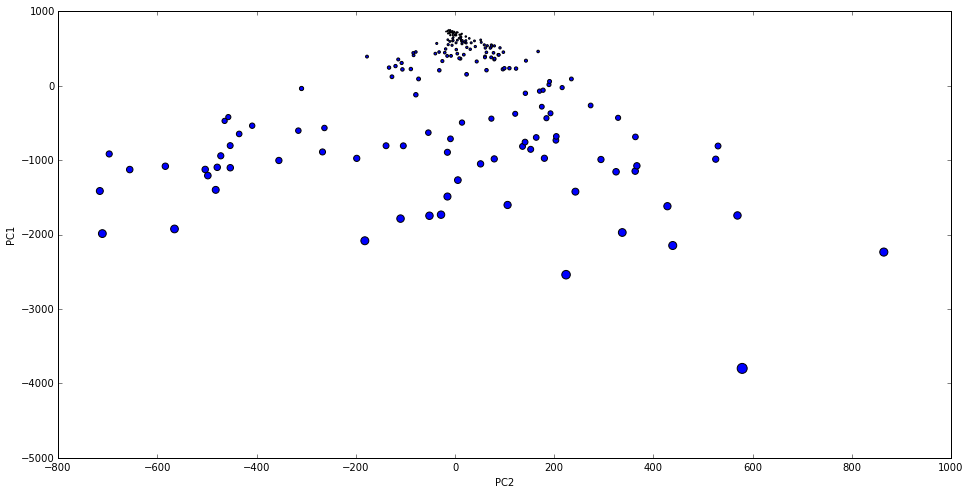

In [11]:
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2d['country_mean_scaled']*100, 
    figsize=(16,8))

In [ ]:
#hacemos lo mismo con el campo calculado

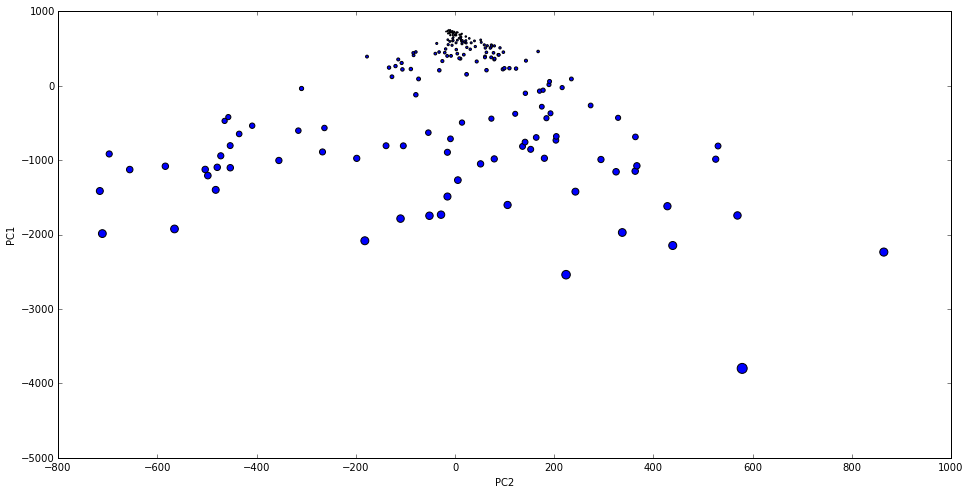

In [16]:
existing_df_2d['country_sum'] = pd.Series(
    existing_df.sum(axis=1), 
    index=existing_df_2d.index)
country_sum_max = existing_df_2d['country_sum'].max()
country_sum_min = existing_df_2d['country_sum'].min()
country_sum_scaled = (existing_df_2d.country_sum-country_sum_min) / country_sum_max
existing_df_2d['country_sum_scaled'] = pd.Series(
        country_sum_scaled, 
        index=existing_df_2d.index)
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2d['country_sum_scaled']*100, 
    figsize=(16,8))

In [18]:
existing_df_2d['country_change'] = pd.Series(
    existing_df['2007']-existing_df['1990'], 
    index=existing_df_2d.index)
country_change_max = existing_df_2d['country_change'].max()
country_change_min = existing_df_2d['country_change'].min()
country_change_scaled = (existing_df_2d.country_change - country_change_min) / country_change_max
existing_df_2d['country_change_scaled'] = pd.Series(
        country_change_scaled, 
        index=existing_df_2d.index)
existing_df_2d[['country_change','country_change_scaled']].head()

,country_change,country_change_scaled
country,,
Afghanistan,-198,0.850840
Albania,-20,1.224790
Algeria,11,1.289916
American Samoa,-37,1.189076
Andorra,-20,1.224790


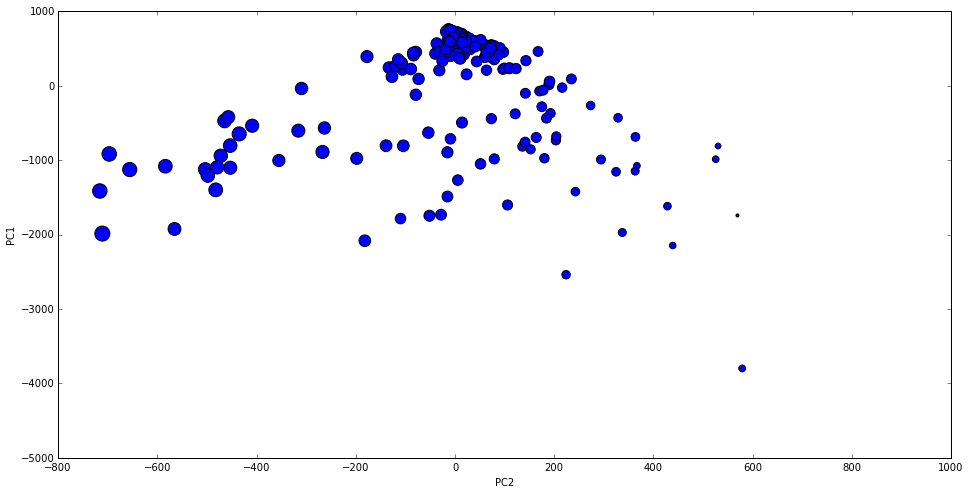

In [19]:
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2d['country_change_scaled']*100, 
    figsize=(16,8))

In [ ]:
#Resultados del PCA, cuando el uso del color / tamaño para codificar la diferencia del número de casos entre (2007 y 1990), 
#el gradiente de color cambió todo a lo largo de la dirección de la segunda componente principal. 

#Es decir, mientras que la primera PC captura la mayor parte de la variación 
#en el conjunto de datos la cual se basa en el total de casos en el rango de 1990 a 2007.

#el segundo PC se ve afectada en gran medida por el cambio en el tiempo.

In [ ]:
#k-means clustering

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(existing_df)

In [21]:
existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)

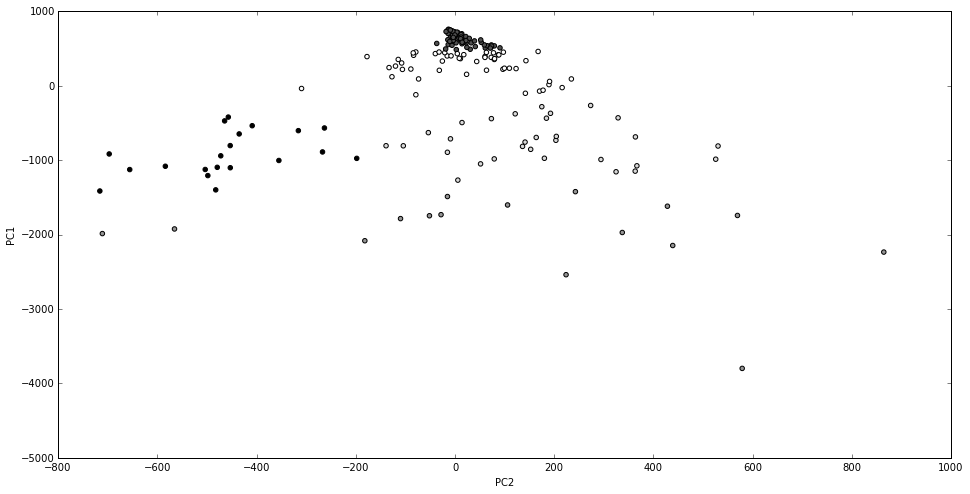

In [22]:
import numpy as np

existing_df_2d.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=existing_df_2d.cluster.astype(np.float), 
        figsize=(16,8))


In [25]:
#Usamos una columna de cluster como colores, no se ve muy bien.

SyntaxError: invalid syntax (<ipython-input-25-3cf86b2822b2>, line 1)